<a href="https://colab.research.google.com/github/prajwalnigam321/Data-Science-and-Machine-Learning/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp # 1 sample t test
from scipy.stats import ttest_ind # Takes data as input and returns stat and p
from scipy.stats import ttest_ind_from_stats # Takes sample means, std, n and returns stat and p

### Problem Solving Hints
We have code to do the following:
 1. ttest one sample.
 2. ttest two sample from data.
 3. ttest two sample from descriptive stats.

In [ ]:
## From the scratch implementation of ttest_ind
# EQUIVALENT FUNCTION: scipy.stats.ttest_ind
from scipy.stats import t

def ttest_ind_from_data(d1, d2, alternative="two-sided"):
    """
    d1: pandas Series
    d2: pandas Series
    alternative: {‘two-sided’, ‘less’, ‘greater’}, optional
    """
    n1 = len(d1)
    n2 = len(d2)
    
    m1 = d1.mean()
    m2 = d2.mean()
    
    s1 = d1.std()
    s2 = d2.std()
    
    df = n1 + n2 - 2
    
    s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))
    
    t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))
    
    if alternative == "two-sided":
        p_value = 2*(1 - t.cdf(t_stat, df=df))
    if alternative == "less":
        p_value = t.cdf(t_stat, df=df)
    if alternative == "greater":
        p_value = 1 - t.cdf(t_stat, df=df)
    print("T-stat = ", t_stat)
    print("P-value = ", p_value)

In [ ]:
# EQUIVALENT FUNCTION: scipy.stats.ttest_ind_from_stats
def ttest_ind_from_mean_and_std_dev(m1, s1, n1, m2, s2, n2, alternative="two-sided"):
    """
    m1, m2: mean of first and second set of samples respectively
    n1, n2: number of samples in first and second set respectively
    s1, s2: sample standard deviations of first and second set respectively
    alternative: {‘two-sided’, ‘less’, ‘greater’}, optional
    """
    df = n1 + n2 - 2
    
    s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))
    
    t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))
    
    if alternative == "two-sided":
        p_value = 2*(1 - t.cdf(t_stat, df=df))
    if alternative == "less":
        p_value = t.cdf(t_stat, df=df)
    if alternative == "greater":
        p_value = 1 - t.cdf(t_stat, df=df)
    print("T-stat = ", t_stat)
    print("P-value = ", p_value)

## Coin example - Chi-square test

In [ ]:
from scipy.stats import chi2

stat = 0.72
print("p-value: ", 1 - chi2.cdf(stat, df=1))

p-value:  0.3961439091520741


In [ ]:
## Assume a stat significance of alpha = 95%
print(chi2.ppf(0.95, df = 1))

3.841458820694124


In [ ]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare([28, 22], [25, 25])
print(chi_stat)
print(p_value)

0.72
0.3961439091520741


In [ ]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare([45, 5], [25, 25])
print(chi_stat)
print(p_value)

32.0
1.5417257900280013e-08


### Dice example

In [ ]:
## p-value of the dice example
alpha = 0.1
p_value = 1 - chi2.cdf(9.67, df = 5)
if p_value < alpha:
    print("Reject the null hypothesis, dice is biased")
else:
    print("Fail to reject the null hypothesis, dice is fair")

Reject the null hypothesis, dice is biased


In [ ]:
crit_val = chi2.ppf(0.9, df=5)

chi_stat, p_value = chisquare([2, 4, 8, 9, 3, 10], [6]*6)
print("Chi2 stat:", chi_stat)
print("Critical value:", chi_stat)
print("p-value: ", p_value)

if chi_stat > crit_val:
    print("Reject the null hypothesis, dice is biased")
else:
    print("Fail to reject the null hypothesis, dice is fair")

Chi2 stat: 9.666666666666666
Critical value: 9.666666666666666
p-value:  0.08525020077588863
Reject the null hypothesis, dice is biased


### Gender vs. Buying preference

In [ ]:
from scipy.stats import chi2_contingency

observed = [527, 72, 206, 102]
expected = [484, 115, 249, 59]

chi_stat, p_value = chisquare(observed, expected)
print(chi_stat)
print(p_value)

58.66319466554195
1.1344741517267437e-12


In [ ]:
from scipy.stats import chi2_contingency

observed = [
    [527, 72],
    [206, 102]
]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(chi_stat, p_value)

57.04098674049609 4.268230756875865e-14


### Aerofit Dataset

In [ ]:
df_aerofit = pd.read_csv("aerofit.csv")

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Income vs. Product
If we know the income, can we predice which product is bought?

<AxesSubplot:xlabel='Product', ylabel='Income'>

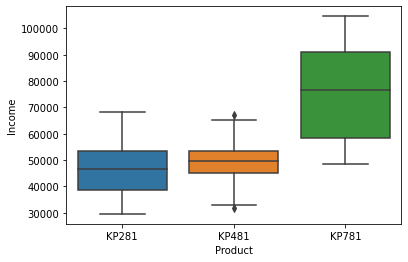

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

### Step 1: Convert the continuous variable income to a categorical variable

In [ ]:
bins = [0, df_aerofit["Income"].median(), df_aerofit["Income"].max()]
labels = ["low", "high"]
df_aerofit["Income_bin"] = pd.cut(df_aerofit["Income"], bins, labels=labels)

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_bin
0,KP281,18,Male,14,Single,3,4,29562,112,low
1,KP281,19,Male,15,Single,2,3,31836,75,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low
3,KP281,19,Male,12,Single,3,3,32973,85,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low


### Step 2: Define the contingency table

In [ ]:
income_bin_product = pd.crosstab(index=df_aerofit["Income_bin"], columns=df_aerofit["Product"])
income_bin_product

Product,KP281,KP481,KP781
Income_bin,,,
low,50,35,5
high,30,25,35


In [ ]:
# H0: income bin and product are independent
# Ha: dependant
chi2_contingency(income_bin_product) # chistat, p-value, df, expected

(29.166666666666668,
 4.640222499769401e-07,
 2,
 array([[40., 30., 20.],
        [40., 30., 20.]]))

## Gender vs. Income

In [ ]:
gender_income_product = pd.crosstab(index=df_aerofit["Gender"], columns=df_aerofit["Income_bin"])
gender_income_product

Income_bin,low,high
Gender,,
Female,46,30
Male,44,60


In [ ]:
# H0: gender and income are independent
# Ha: dependant
chi2_contingency(gender_income_product) # chistat, p-value, df, expected

(5.123987854251012,
 0.023597328751612016,
 1,
 array([[38., 38.],
        [52., 52.]]))

In [ ]:
## With an alpha of 0.05, we conclude that income and gender are dependent

### Doubt session question 1

The average hourly wage of a sample of 150 workers in plant 'A' was Rs.2·87 with a standard deviation of Rs. 1·08.

The average wage of a sample of 200 workers in plant 'B' was Rs. 2·56 with a standard deviation of Rs. 1·28.

Can an applicant safely assume that the hourly wages paid by plant 'A' are higher than those paid by plant 'B' at a 1% significance level?

In [ ]:
## 1-sample or 2? 2 sample test -> ttest_ind
## data or stats? stats -> ttest_ind_from_stats
## Left tailed or right tailed? -> right tailed, I want to show that A is greater than B
## Significance level -> 1%, so alpha = 0.01

mean_1 = 2.87
std_dev_1 = 1.08
n1 = 150

mean_2 = 2.56
std_dev_2 = 1.28
n2 = 200

alpha = 0.01

t_stat, p_value = ttest_ind_from_stats(mean_1, std_dev_1, n1, mean_2, std_dev_2, n2, alternative="greater")
print(t_stat, p_value)

if p_value < alpha:
    print("Reject the null hypothesis, the two means are different")
else:
    print("Accept the null hypothesis, the two means are the same")

2.3947738234213953 0.008579470194694674
Reject the null hypothesis, the two means are different


In [ ]:
ttest_ind_from_mean_and_std_dev(mean_1, std_dev_1, n1, mean_2, std_dev_2, n2, alternative="greater")

T-stat =  2.3947738234213953
P-value =  0.008579470194694738


### How to calculate the p-value for a 2-tailed test?
I am going to show how using the t-distribution, for the above question.

In [ ]:
## 1-sample or 2? 2 sample test -> ttest_ind
## data or stats? stats -> ttest_ind_from_stats
## Left tailed or right tailed? -> right tailed, I want to show that A is greater than B
## Significance level -> 1%, so alpha = 0.01

mean_1 = 2.87
std_dev_1 = 1.08
n1 = 150

mean_2 = 2.56
std_dev_2 = 1.28
n2 = 200

alpha = 0.01

t_stat, p_value = ttest_ind_from_stats(mean_1, std_dev_1, n1, mean_2, std_dev_2, n2)
print(t_stat, p_value)

if p_value < alpha:
    print("Reject the null hypothesis, the two means are different")
else:
    print("Accept the null hypothesis, the two means are the same")

2.3947738234213953 0.017158940389389348
Accept the null hypothesis, the two means are the same


In [ ]:
m1 = 2.87
s1 = 1.08
n1 = 150

m2 = 2.56
s2 = 1.28
n2 = 200

df = n1 + n2 - 2
    
s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))

t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))

In [ ]:
neg = -1 * np.abs(t_stat)
pos =  1 * np.abs(t_stat)

dof = n1 + n2 - 2

p_value_neg = t.cdf(neg, df=dof)
p_value_pos = 1 - t.cdf(pos, df=dof)

p_value = p_value_pos + p_value_neg

print(p_value_neg, p_value_pos, p_value) # Should be 0.017158940389389348

0.008579470194694674 0.008579470194694738 0.017158940389389414


### Q2) Smokers
When smokers smoke, nicotine is transformed into cotinine, which can be tested.

The average cotinine level in a group of 50 smokers was 243.5 ng ml.

Assuming that the standard deviation is known to be 229.5 ng ml, at 95 % confidence, test the assertion that the mean cotinine level of all smokers is equal to 300.0 ng ml.

In [ ]:
m1 = 300
s1 = 229.5
n1 = 50

m2 = 243.5
s2 = 229.5
n2 = 1000000

df = n1 + n2 - 2
    
s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))

t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))
print(t_stat)

1.740764025540937


In [ ]:
t.ppf(0.975, df=n1 - 1)

2.009575234489209